*The Colab notebook outlines a project focused on data processing and analytics using Apache Spark and PySpark. Here's a summary of its content:*

**Setup and Installation:**

Installation of necessary packages, including Java, Apache Spark, and PySpark.
Configuration of environment variables and initialization of a Spark session.

**Data Loading and Initial Processing:**

Loading a dataset from a JSON file using Spark.
Displaying the dataset and its schema for initial inspection.

**Data Cleaning and Transformation:**

Dropping rows with null values and removing duplicates.
Checking for the presence of a specific column (pro) and extracting its nested fields if it exists.
Further transformations and selections to prepare the data for analysis.

**DataFrame Operations:**

Various operations on DataFrames, such as selecting specific columns, filtering data, and handling nested JSON structures.
The notebook is structured to perform data ingestion, cleaning, and transformation tasks using Spark, setting the foundation for further analysis or modeling.
The detailed steps ensure the data is properly prepared for subsequent stages of the data pipeline.

In [ ]:
!pip install -q py4j


This code sets up and initializes an Apache Spark environment in a Jupyter notebook, enabling data processing and analytics using PySpark. The setup includes installing necessary dependencies, configuring the environment, and initializing a Spark session.

In [ ]:

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!wget -q https://archive.apache.org/dist/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz
!tar xf spark-3.4.1-bin-hadoop3.tgz

!pip install -q pyspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.1-bin-hadoop3"
os.environ["PATH"] = os.environ["SPARK_HOME"] + "/bin:" + os.environ["PATH"]

!java -version
!echo $JAVA_HOME
!echo $SPARK_HOME

from pyspark.sql import SparkSession
from pyspark import SparkConf

conf = SparkConf() \
    .setAppName("User_profile") \
    .setMaster("local[*]") \
    .set("spark.driver.memory", "2g") \
    .set("spark.executor.memory", "2g") \
    .set("spark.sql.shuffle.partitions", "200") \
    .set("spark.driver.maxResultSize", "1g") \
    .set("spark.jars.packages", "org.apache.spark:spark-sql_2.12:3.4.1")

spark = SparkSession.builder.config(conf=conf).getOrCreate()

spark.range(5).show()


openjdk version "11.0.23" 2024-04-16
OpenJDK Runtime Environment (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1)
OpenJDK 64-Bit Server VM (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)
/usr/lib/jvm/java-8-openjdk-amd64
/content/spark-3.4.1-bin-hadoop3
+---+
| id|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
+---+



This section of code involves reading a data file into a Spark DataFrame, displaying its contents, and printing its schema to understand the structure of the data.

In [ ]:



df = spark.read.csv('/content/drive/MyDrive/sample_random.json', header=True, inferSchema=True)


df.show()
df.printSchema()


+--------------------+
|                   [|
+--------------------+
|                   {|
|        "akey": "...|
|        "avn": "6...|
|        "crmid": ...|
|        "did": "e...|
|         "dtpe": "S"|
|        "evtno": "1"|
|        "idamid":...|
|        "key": "m...|
|          "lat": "0"|
|          "lng": "0"|
|        "logno": ...|
|        "mnu": "O...|
|         "nwk": "4G"|
|        "osv": "8...|
|           "pf": "A"|
|            "pro": {|
|            "HARD...|
|            "avr"...|
|            "bbc"...|
+--------------------+
only showing top 20 rows

root
 |-- [: string (nullable = true)



This process involves setting up a Spark environment, reading and inspecting JSON data, handling potential data integrity issues, and transforming the data into a more usable format.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, split

spark = SparkSession.builder \
    .appName("JioAnalyticsProcessing") \
    .getOrCreate()


file_path = "/content/drive/MyDrive/sample_random.json"

df = spark.read.option("multiline", "true").json(file_path)

df.printSchema()

df.show(truncate=False)

if "_corrupt_record" in df.columns:
    df.filter(col("_corrupt_record").isNotNull()).show(truncate=False)

if 'pro' in df.columns:
    df = df.select(
        col("akey"),
        col("avn"),
        col("crmid"),
        col("did"),
        col("dtpe"),
        col("evtno"),
        col("idamid"),
        col("key"),
        col("pro.*"),
        col("rtc"),
        col("sid"),
        col("uid"),
        col("x-forwarded-for").alias("ip_address"),
        col("dateflink")
    )


    df = df.withColumn("program_date", col("program_date").cast("date"))
    df = df.withColumn("program_hour", split(col("program_time"), ":")[0].cast("integer"))


    df.show(truncate=False)





root
 |-- akey: string (nullable = true)
 |-- avn: string (nullable = true)
 |-- crmid: string (nullable = true)
 |-- dateflink: string (nullable = true)
 |-- did: string (nullable = true)
 |-- dtpe: string (nullable = true)
 |-- evtno: string (nullable = true)
 |-- idamid: string (nullable = true)
 |-- key: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- lng: string (nullable = true)
 |-- logno: string (nullable = true)
 |-- mnu: string (nullable = true)
 |-- nwk: string (nullable = true)
 |-- osv: string (nullable = true)
 |-- pf: string (nullable = true)
 |-- pro: struct (nullable = true)
 |    |-- HARD_CODE_DEVICE_ID: string (nullable = true)
 |    |-- avr: string (nullable = true)
 |    |-- bbc: string (nullable = true)
 |    |-- bbd: string (nullable = true)
 |    |-- bc: string (nullable = true)
 |    |-- bd: string (nullable = true)
 |    |-- bdl: string (nullable = true)
 |    |-- bufferdetails: string (nullable = true)
 |    |-- cellid: string (nullable = tru

This line of code effectively reads a multi-line JSON file into a Spark DataFrame, enabling subsequent data processing tasks. By setting the multiline option to true, the code ensures that JSON records spanning multiple lines are correctly parsed, maintaining the integrity of the data.

In [ ]:
raw_df = spark.read.option("multiline", "true").json(file_path)


raw_df.printSchema()
raw_df.show(truncate=False)


root
 |-- akey: string (nullable = true)
 |-- avn: string (nullable = true)
 |-- crmid: string (nullable = true)
 |-- dateflink: string (nullable = true)
 |-- did: string (nullable = true)
 |-- dtpe: string (nullable = true)
 |-- evtno: string (nullable = true)
 |-- idamid: string (nullable = true)
 |-- key: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- lng: string (nullable = true)
 |-- logno: string (nullable = true)
 |-- mnu: string (nullable = true)
 |-- nwk: string (nullable = true)
 |-- osv: string (nullable = true)
 |-- pf: string (nullable = true)
 |-- pro: struct (nullable = true)
 |    |-- HARD_CODE_DEVICE_ID: string (nullable = true)
 |    |-- avr: string (nullable = true)
 |    |-- bbc: string (nullable = true)
 |    |-- bbd: string (nullable = true)
 |    |-- bc: string (nullable = true)
 |    |-- bd: string (nullable = true)
 |    |-- bdl: string (nullable = true)
 |    |-- bufferdetails: string (nullable = true)
 |    |-- cellid: string (nullable = tru

Exploratory Data Analysis (EDA):

Descriptive Statistics: The describe().show() method generates summary statistics for numeric columns, providing insights into the data distribution.

Unique Values: The select().distinct().show() method extracts specific columns from a nested structure, removes duplicates, and displays the unique values, offering a clear view of the distinct combinations present in those columns.

In [ ]:

raw_df.printSchema()
raw_df.describe().show()
raw_df.select("pro.cg", "pro.ch", "pro.show_genre").distinct().show()


root
 |-- akey: string (nullable = true)
 |-- avn: string (nullable = true)
 |-- crmid: string (nullable = true)
 |-- dateflink: string (nullable = true)
 |-- did: string (nullable = true)
 |-- dtpe: string (nullable = true)
 |-- evtno: string (nullable = true)
 |-- idamid: string (nullable = true)
 |-- key: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- lng: string (nullable = true)
 |-- logno: string (nullable = true)
 |-- mnu: string (nullable = true)
 |-- nwk: string (nullable = true)
 |-- osv: string (nullable = true)
 |-- pf: string (nullable = true)
 |-- pro: struct (nullable = true)
 |    |-- HARD_CODE_DEVICE_ID: string (nullable = true)
 |    |-- avr: string (nullable = true)
 |    |-- bbc: string (nullable = true)
 |    |-- bbd: string (nullable = true)
 |    |-- bc: string (nullable = true)
 |    |-- bd: string (nullable = true)
 |    |-- bdl: string (nullable = true)
 |    |-- bufferdetails: string (nullable = true)
 |    |-- cellid: string (nullable = tru

Data Cleaning:

Processing the 'pro' Column


Existence Check: Verified if the 'pro' column is present in the dataset.

Data Extraction: If the 'pro' column contains data, all nested fields within 'pro' were extracted into a new DataFrame (pro_df).

Schema Display: The schema of the extracted pro_df was printed to ensure all necessary fields were included.

Column Selection: Created a new DataFrame with selected columns from the original dataset, including nested fields from 'pro', and renamed 'x-forwarded-for' to 'ip_address'.

Data Type Casting: Cast specific fields within 'pro' to appropriate data types (e.g., converting watch time fields to DoubleType, program date to date type, and extracting program hour).

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, split
from pyspark.sql.types import DoubleType

spark = SparkSession.builder \
    .appName("JioAnalyticsProcessing") \
    .getOrCreate()

file_path = "/content/drive/MyDrive/sample_random.json"

raw_df = spark.read.option("multiline", "true").json(file_path)

raw_df = raw_df.na.drop()


raw_df = raw_df.dropDuplicates()


raw_df.printSchema()
raw_df.show(truncate=False)


if 'pro' in raw_df.columns:
    raw_df.select("pro").show(truncate=False)


    if not raw_df.select("pro").rdd.isEmpty():
        pro_df = raw_df.select("pro.*")
        pro_df.printSchema()
        raw_df = raw_df.select(
            col("akey"),
            col("avn"),
            col("crmid"),
            col("did"),
            col("dtpe"),
            col("evtno"),
            col("idamid"),
            col("key"),
            col("lat"),
            col("lng"),
            col("logno"),
            col("mnu"),
            col("nwk"),
            col("osv"),
            col("pf"),
            col("rtc"),
            col("sid"),
            col("uid"),
            col("x-forwarded-for").alias("ip_address"),
            col("dateflink"),
            col("pro.HARD_CODE_DEVICE_ID"),
            col("pro.avr"),
            col("pro.bbc"),
            col("pro.bbd"),
            col("pro.bc"),
            col("pro.bd"),
            col("pro.bdl"),
            col("pro.bufferdetails"),
            col("pro.cellid"),
            col("pro.cg"),
            col("pro.ch"),
            col("pro.channel_id"),
            col("pro.cl"),
            col("pro.codec"),
            col("pro.d"),
            col("pro.dm"),
            col("pro.encryption"),
            col("pro.ep"),
            col("pro.finish"),
            col("pro.index"),
            col("pro.isottuser"),
            col("pro.jio_id"),
            col("pro.keywords"),
            col("pro.lac"),
            col("pro.n"),
            col("pro.opr"),
            col("pro.pci"),
            col("pro.playback_screen"),
            col("pro.player"),
            col("pro.pn"),
            col("pro.prof"),
            col("pro.program_date"),
            col("pro.program_time"),
            col("pro.prow"),
            col("pro.rsrp"),
            col("pro.rsrq"),
            col("pro.rssi"),
            col("pro.rtc"),
            col("pro.serial_number"),
            col("pro.settype"),
            col("pro.show_genre"),
            col("pro.source"),
            col("pro.ss"),
            col("pro.start"),
            col("pro.startuptime"),
            col("pro.t"),
            col("pro.tac"),
            col("pro.tac_id"),
            col("pro.timestamp"),
            col("pro.u"),
            col("pro.unique_session_id"),
            col("pro.unique_session_timestamp"),
            col("pro.watch_time_dock"),
            col("pro.watch_time_landscape"),
            col("pro.watch_time_pip"),
            col("pro.watch_time_portrait")
        )


        raw_df = raw_df.withColumn("watch_time_portrait", col("watch_time_portrait").cast(DoubleType()))
        raw_df = raw_df.withColumn("watch_time_landscape", col("watch_time_landscape").cast(DoubleType()))
        raw_df = raw_df.withColumn("watch_time_dock", col("watch_time_dock").cast(DoubleType()))
        raw_df = raw_df.withColumn("watch_time_pip", col("watch_time_pip").cast(DoubleType()))
        raw_df = raw_df.withColumn("program_date", col("program_date").cast("date"))
        raw_df = raw_df.withColumn("program_hour", split(col("program_time"), ":")[0].cast("integer"))


        raw_df = raw_df.withColumn("watch_time_total",
            col("watch_time_landscape") + col("watch_time_portrait") + col("watch_time_dock") + col("watch_time_pip"))


if 'watch_time_portrait' in raw_df.columns:

    raw_df = raw_df.na.drop(subset=["watch_time_portrait"])


raw_df.show(truncate=False)


raw_df.printSchema()



root
 |-- akey: string (nullable = true)
 |-- avn: string (nullable = true)
 |-- crmid: string (nullable = true)
 |-- dateflink: string (nullable = true)
 |-- did: string (nullable = true)
 |-- dtpe: string (nullable = true)
 |-- evtno: string (nullable = true)
 |-- idamid: string (nullable = true)
 |-- key: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- lng: string (nullable = true)
 |-- logno: string (nullable = true)
 |-- mnu: string (nullable = true)
 |-- nwk: string (nullable = true)
 |-- osv: string (nullable = true)
 |-- pf: string (nullable = true)
 |-- pro: struct (nullable = true)
 |    |-- HARD_CODE_DEVICE_ID: string (nullable = true)
 |    |-- avr: string (nullable = true)
 |    |-- bbc: string (nullable = true)
 |    |-- bbd: string (nullable = true)
 |    |-- bc: string (nullable = true)
 |    |-- bd: string (nullable = true)
 |    |-- bdl: string (nullable = true)
 |    |-- bufferdetails: string (nullable = true)
 |    |-- cellid: string (nullable = tru

handling dates
 Convert Date Columns

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_timestamp

spark = SparkSession.builder.appName("RecommendationModel").getOrCreate()




*   Inspecting the schema and data of the DataFrame
*   Extracting all fields from 'pro' and include them in the schema
*   Cast relevant fields within 'pro'
*   Computing watch time






In [ ]:


if 'pro' in raw_df.columns:
    raw_df.select("pro").show(truncate=False)


    if not raw_df.select("pro").rdd.isEmpty():
        raw_df = raw_df.select(
            col("akey"),
            col("avn"),
            col("crmid"),
            col("did"),
            col("dtpe"),
            col("evtno"),
            col("idamid"),
            col("key"),
            col("lat"),
            col("lng"),
            col("logno"),
            col("mnu"),
            col("nwk"),
            col("osv"),
            col("pf"),
            col("rtc").alias("rtc_main"),
            col("sid"),
            col("uid"),
            col("x-forwarded-for").alias("ip_address"),
            col("dateflink"),
            col("pro.HARD_CODE_DEVICE_ID").alias("HARD_CODE_DEVICE_ID"),
            col("pro.avr").alias("avr"),
            col("pro.bbc").alias("bbc"),
            col("pro.bbd").alias("bbd"),
            col("pro.bc").alias("bc"),
            col("pro.bd").alias("bd"),
            col("pro.bdl").alias("bdl"),
            col("pro.bufferdetails").alias("bufferdetails"),
            col("pro.cellid").alias("cellid"),
            col("pro.cg").alias("cg"),
            col("pro.ch").alias("ch"),
            col("pro.channel_id").alias("channel_id"),
            col("pro.cl").alias("cl"),
            col("pro.codec").alias("codec"),
            col("pro.d").alias("d"),
            col("pro.dm").alias("dm"),
            col("pro.encryption").alias("encryption"),
            col("pro.ep").alias("ep"),
            col("pro.finish").alias("finish"),
            col("pro.index").alias("index"),
            col("pro.isottuser").alias("isottuser"),
            col("pro.jio_id").alias("jio_id"),
            col("pro.keywords").alias("keywords"),
            col("pro.lac").alias("lac"),
            col("pro.n").alias("n"),
            col("pro.opr").alias("opr"),
            col("pro.pci").alias("pci"),
            col("pro.playback_screen").alias("playback_screen"),
            col("pro.player").alias("player"),
            col("pro.pn").alias("pn"),
            col("pro.prof").alias("prof"),
            col("pro.program_date").alias("program_date"),
            col("pro.program_time").alias("program_time"),
            col("pro.prow").alias("prow"),
            col("pro.rsrp").alias("rsrp"),
            col("pro.rsrq").alias("rsrq"),
            col("pro.rssi").alias("rssi"),
            col("pro.rtc").alias("pro_rtc"),
            col("pro.serial_number").alias("serial_number"),
            col("pro.settype").alias("settype"),
            col("pro.show_genre").alias("show_genre"),
            col("pro.source").alias("source"),
            col("pro.ss").alias("ss"),
            col("pro.start").alias("start"),
            col("pro.startuptime").alias("startuptime"),
            col("pro.t").alias("t"),
            col("pro.tac").alias("tac"),
            col("pro.tac_id").alias("tac_id"),
            col("pro.timestamp").alias("pro_timestamp"),
            col("pro.u").alias("u"),
            col("pro.unique_session_id").alias("unique_session_id"),
            col("pro.unique_session_timestamp").alias("unique_session_timestamp"),
            col("pro.watch_time_dock").alias("watch_time_dock"),
            col("pro.watch_time_landscape").alias("watch_time_landscape"),
            col("pro.watch_time_pip").alias("watch_time_pip"),
            col("pro.watch_time_portrait").alias("watch_time_portrait")
        )


        raw_df = raw_df.withColumn("watch_time_portrait", col("watch_time_portrait").cast(DoubleType()))
        raw_df = raw_df.withColumn("watch_time_landscape", col("watch_time_landscape").cast(DoubleType()))
        raw_df = raw_df.withColumn("watch_time_dock", col("watch_time_dock").cast(DoubleType()))
        raw_df = raw_df.withColumn("watch_time_pip", col("watch_time_pip").cast(DoubleType()))
        raw_df = raw_df.withColumn("program_date", to_timestamp(col("program_date"), "EEE MMM dd HH:mm:ss z yyyy"))
        raw_df = raw_df.withColumn("program_hour", split(col("program_time"), ":")[0].cast("integer"))


        raw_df = raw_df.withColumn("watch_time_total",
            col("watch_time_landscape") + col("watch_time_portrait") + col("watch_time_dock") + col("watch_time_pip"))


if 'watch_time_portrait' in raw_df.columns:

    raw_df = raw_df.na.drop(subset=["watch_time_portrait"])

if 'pro_timestamp' in raw_df.columns:
    raw_df.select("program_date", "pro_timestamp").show(truncate=False)
else:
    print("Column 'pro_timestamp' does not exist. Please verify the correct column name.")



raw_df.show(truncate=False)

raw_df.printSchema()

Column 'pro_timestamp' does not exist. Please verify the correct column name.
+---------+-----+----------+------------+----+-----+------------------------------------+------------+---+---+-----+-------+---+-----+---+-------------+----------+----------------+---------------+-------------------+--------------------------------+---+---+---+---+---+---+-------------+------+-------------+-----------+----------+--------+-----+---+----------------+----------+---+------+-----+---------+----------+------------+---+----------------------+------+---+---------------+---------+----------------------+--------+-------------------+------------+----+----+----+----+-------------+-------------+-------+----------+----------------+---+-----+-----------+----+---+------+----------------------------------+--------------------------------------------------------------------+------------------------------------+------------------------+---------------+--------------------+--------------+-------------------+----



Converting program_date to timestamp




In [ ]:
from pyspark.sql.functions import to_timestamp, col

raw_df = raw_df.withColumn("timestamp", to_timestamp(col("timestamp"), "EEE MMM dd HH:mm:ss z yyyy"))

raw_df.select("program_date", "timestamp").show(truncate=False)


+-------------------+-------------------+
|program_date       |timestamp          |
+-------------------+-------------------+
|2021-06-02 00:00:00|2024-06-02 13:00:54|
|2021-06-02 00:00:00|2024-06-03 02:21:05|
|2021-06-02 00:00:00|2024-05-31 23:25:32|
|2021-06-02 00:00:00|2024-06-03 20:42:02|
|2021-06-02 00:00:00|2024-05-30 07:07:47|
|2021-06-02 00:00:00|2024-06-04 12:38:04|
|2021-06-02 00:00:00|2024-05-31 21:18:57|
|2021-06-02 00:00:00|2024-06-03 23:44:37|
|2021-06-02 00:00:00|2024-06-03 21:50:35|
|2021-06-02 00:00:00|2024-06-05 16:58:49|
|2021-06-02 00:00:00|2024-06-01 02:00:15|
|2021-06-02 00:00:00|2024-06-03 23:07:46|
|2021-06-02 00:00:00|2024-06-04 09:21:43|
|2021-06-02 00:00:00|2024-06-04 10:13:09|
|2021-06-02 00:00:00|2024-05-31 10:55:42|
|2021-06-02 00:00:00|2024-06-01 06:24:34|
|2021-06-02 00:00:00|2024-05-31 10:35:18|
|2021-06-02 00:00:00|2024-06-05 15:31:41|
|2021-06-02 00:00:00|2024-05-31 23:27:39|
|2021-06-02 00:00:00|2024-05-30 05:47:20|
+-------------------+-------------

Additional Data Cleaning and Feature Engineering

Handle Null Values and Duplicates:

Convert Columns to Appropriate Data Types:

In [ ]:

raw_df.show(truncate=False)



+---------+-----+----------+------------+----+-----+------------------------------------+------------+---+---+-----+-------+---+-----+---+-------------+----------+----------------+---------------+-------------------+--------------------------------+---+---+---+---+---+---+-------------+------+-------------+-----------+----------+--------+-----+---+----------------+----------+---+------+-----+---------+----------+------------+---+----------------------+------+---+---------------+---------+----------------------+--------+-------------------+------------+----+----+----+----+-------------+-------------+-------+----------+----------------+---+-----+-----------+----+---+------+-------------------+--------------------------------------------------------------------+------------------------------------+------------------------+---------------+--------------------+--------------+-------------------+------------+----------------+
|akey     |avn  |crmid     |did         |dtpe|evtno|idamid        

In [ ]:
raw_df.printSchema()

root
 |-- akey: string (nullable = true)
 |-- avn: string (nullable = true)
 |-- crmid: string (nullable = true)
 |-- did: string (nullable = true)
 |-- dtpe: string (nullable = true)
 |-- evtno: string (nullable = true)
 |-- idamid: string (nullable = true)
 |-- key: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- lng: string (nullable = true)
 |-- logno: string (nullable = true)
 |-- mnu: string (nullable = true)
 |-- nwk: string (nullable = true)
 |-- osv: string (nullable = true)
 |-- pf: string (nullable = true)
 |-- rtc: string (nullable = true)
 |-- sid: string (nullable = true)
 |-- uid: string (nullable = true)
 |-- ip_address: string (nullable = true)
 |-- dateflink: string (nullable = true)
 |-- HARD_CODE_DEVICE_ID: string (nullable = true)
 |-- avr: string (nullable = true)
 |-- bbc: string (nullable = true)
 |-- bbd: string (nullable = true)
 |-- bc: string (nullable = true)
 |-- bd: string (nullable = true)
 |-- bdl: string (nullable = true)
 |-- bufferde

In [ ]:

raw_df.select("watch_time_portrait", "channel_id").show(20, truncate=False)


+-------------------+----------+
|watch_time_portrait|channel_id|
+-------------------+----------+
|372.0              |204       |
|326.0              |588       |
|449.0              |148       |
|278.0              |608       |
|248.0              |402       |
|479.0              |585       |
|945.0              |450       |
|290.0              |556       |
|789.0              |480       |
|644.0              |326       |
|280.0              |298       |
|84.0               |511       |
|331.0              |628       |
|685.0              |345       |
|488.0              |296       |
|394.0              |138       |
|153.0              |137       |
|98.0               |352       |
|594.0              |342       |
|105.0              |102       |
+-------------------+----------+
only showing top 20 rows



In [ ]:

raw_df.select("pro.*").printSchema()


root
 |-- HARD_CODE_DEVICE_ID: string (nullable = true)
 |-- avr: string (nullable = true)
 |-- bbc: string (nullable = true)
 |-- bbd: string (nullable = true)
 |-- bc: string (nullable = true)
 |-- bd: string (nullable = true)
 |-- bdl: string (nullable = true)
 |-- bufferdetails: string (nullable = true)
 |-- cellid: string (nullable = true)
 |-- cg: string (nullable = true)
 |-- ch: string (nullable = true)
 |-- channel_id: string (nullable = true)
 |-- cl: string (nullable = true)
 |-- codec: string (nullable = true)
 |-- d: string (nullable = true)
 |-- dm: string (nullable = true)
 |-- encryption: string (nullable = true)
 |-- ep: string (nullable = true)
 |-- finish: string (nullable = true)
 |-- index: string (nullable = true)
 |-- isottuser: string (nullable = true)
 |-- jio_id: string (nullable = true)
 |-- keywords: string (nullable = true)
 |-- lac: string (nullable = true)
 |-- n: string (nullable = true)
 |-- opr: string (nullable = true)
 |-- pci: string (nullable = tru

In [ ]:

print("Number of rows in the DataFrame:", raw_df.count())





Number of rows in the DataFrame: 100000


In [ ]:

raw_df.select("watch_time_portrait").show(5, truncate=False)
raw_df.select("channel_id").show(5, truncate=False)


+-------------------+
|watch_time_portrait|
+-------------------+
|372.0              |
|326.0              |
|449.0              |
|278.0              |
|248.0              |
+-------------------+
only showing top 5 rows

+----------+
|channel_id|
+----------+
|204       |
|588       |
|148       |
|608       |
|402       |
+----------+
only showing top 5 rows



In [ ]:
raw_df.show(5, truncate=False)


+---------+-----+----------+------------+----+-----+------------------------------------+------------+---+---+-----+-------+---+-----+---+-------------+----------+----------------+---------------+-------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------+---+---+---+---+---+---+-------------+------+----+----------+----------+--------+-----+---+---------------+----------+---+------+-----+---------+----------+---------+---+-----------------

In [ ]:

from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType

raw_df.select("watch_time_portrait").show(5, truncate=False)



+-------------------+
|watch_time_portrait|
+-------------------+
|372.0              |
|326.0              |
|449.0              |
|278.0              |
|248.0              |
+-------------------+
only showing top 5 rows



Extract and Process Nested Fields:

In [ ]:
from pyspark.sql.functions import explode, split, col

raw_df = raw_df.withColumn("genres", explode(split(col("pro.show_genre"), ",")))

df_features = raw_df.select("uid","crmid","pro.ch", "pro.n","pro.cl","pro.ep","pro.cg","pro.opr","pro.pn", "pro.keywords", "genres", "watch_time_portrait", "pro.program_date", "pro.timestamp","dateflink")


df_features.show(truncate=False)


+----------------+----------+-----------+----------------------+--------+---+-------------+------+----------------------+------------+---------+-------------------+-------------------------+----------------------------------+-------------------+
|uid             |crmid     |ch         |n                     |cl      |ep |cg           |opr   |pn                    |keywords    |genres   |watch_time_portrait|program_date             |timestamp                         |dateflink          |
+----------------+----------+-----------+----------------------+--------+---+-------------+------+----------------------+------------+---------+-------------------+-------------------------+----------------------------------+-------------------+
|00llfqkde3hfiweh|5280814033|ZeeKannada |ZeeKannada : Program2 |Kannada |76 |News         |Jio 4G|Pavitra+Rishta        |["News"]    |["News"] |732                |2021-06-02T00:00:00+05:30|Mon Jun 03 10:34:05 GMT+05:30 2024|2024-06-03 10:34:05|
|q9mz1q83scpuuuv

In [ ]:
df_exploded = raw_df \
    .withColumn("genre", explode(split(raw_df["pro.show_genre"], ","))) \
    .withColumn("keyword", explode(split(raw_df["pro.keywords"], ","))) \
    .withColumn("channel", col("pro.ch")) \
    .withColumn("serial", col("pro.pn"))

distinct_genres = df_exploded.select("genre").distinct()
distinct_keywords = df_exploded.select("keyword").distinct()
distinct_channels = df_exploded.select("channel").distinct()
distinct_serials = df_exploded.select("serial").distinct()

unique_genres = [row["genre"] for row in distinct_genres.collect()]
unique_keywords = [row["keyword"] for row in distinct_keywords.collect()]
unique_channels = [row["channel"] for row in distinct_channels.collect()]
unique_serials = [row["serial"] for row in distinct_serials.collect()]

print("Unique genres:", unique_genres)
print("Unique keywords:", unique_keywords)
print("Unique channels:", unique_channels)
print("Unique serials:", unique_serials)


Unique genres: ['["Drama"]', '["News"]']
Unique keywords: ['["Politics"]', '["Drama"]', '["News"]']
Unique channels: ['ZeeKannada', 'ZeeAnmol', 'ZeeTelugu', 'ZeeTVHD', 'AajTak', 'News18Assam']
Unique serials: ['Punar+Vivaah', 'Mithai+Kottu+Chittemma', 'Trinayani', 'Pavitra+Rishta', 'Afternoon+Express', 'News']


In [ ]:

df_genres = raw_df.withColumn("genre", explode(split(raw_df["pro.show_genre"], ",")))

distinct_genres = df_genres.select("genre").distinct()

unique_genres = distinct_genres.collect()


genres_list = [row["genre"] for row in unique_genres]

print("Unique genres:", genres_list)

Unique genres: ['["Drama"]', '["News"]']


Visualizations for Data Understanding

Sample data for visualization

In [ ]:
import pandas as pd

rows = df_features.collect()

pandas_df = pd.DataFrame(rows, columns=df_features.columns)

print(pandas_df.head())



                uid       crmid          ch                      n        cl  \
0  00llfqkde3hfiweh  5280814033  ZeeKannada  ZeeKannada : Program2   Kannada   
1  q9mz1q83scpuuuvf  8344862428     ZeeTVHD     ZeeTVHD : Program1   Kannada   
2  lc98xucko80l7z8t  8756205690    ZeeAnmol    ZeeAnmol : Program1  Assamese   
3  a7jcoulv2gvvj3vu  4836944596   ZeeTelugu   ZeeTelugu : Program1  Assamese   
4  xdmeawznl6f61q8n  7412863037    ZeeAnmol    ZeeAnmol : Program2     Hindi   

   ep    cg     opr                      pn   keywords     genres  \
0  76  News  Jio 4G          Pavitra+Rishta   ["News"]   ["News"]   
1  90  News  Jio 4G  Mithai+Kottu+Chittemma  ["Drama"]  ["Drama"]   
2  35  News  Jio 4G       Afternoon+Express   ["News"]  ["Drama"]   
3  80  News  Jio 4G            Punar+Vivaah   ["News"]   ["News"]   
4  76  News  Jio 4G  Mithai+Kottu+Chittemma   ["News"]  ["Drama"]   

  watch_time_portrait               program_date  \
0                 732  2021-06-02T00:00:00+05:30   


Plot Distributions and Detect Imbalance

Distribution of Watch Time:

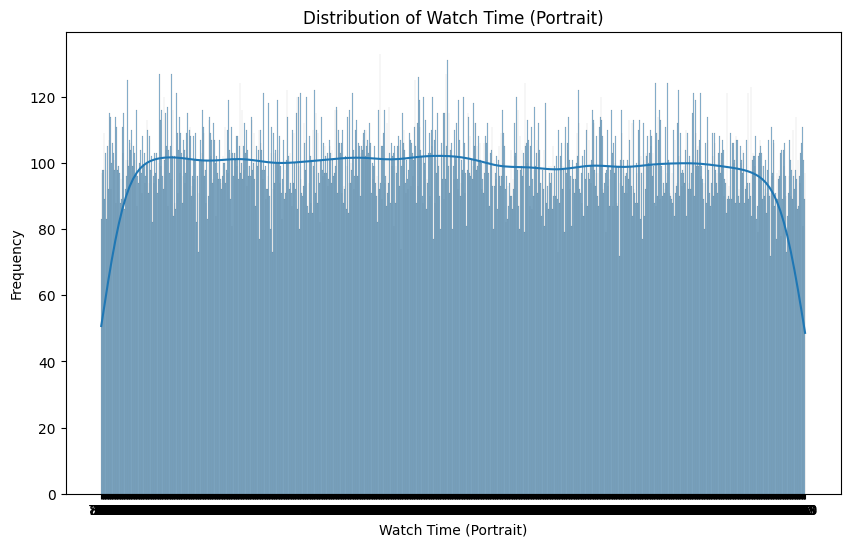

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(pandas_df['watch_time_portrait'], bins=50, kde=True)
plt.title('Distribution of Watch Time (Portrait)')
plt.xlabel('Watch Time (Portrait)')
plt.ylabel('Frequency')
plt.show()

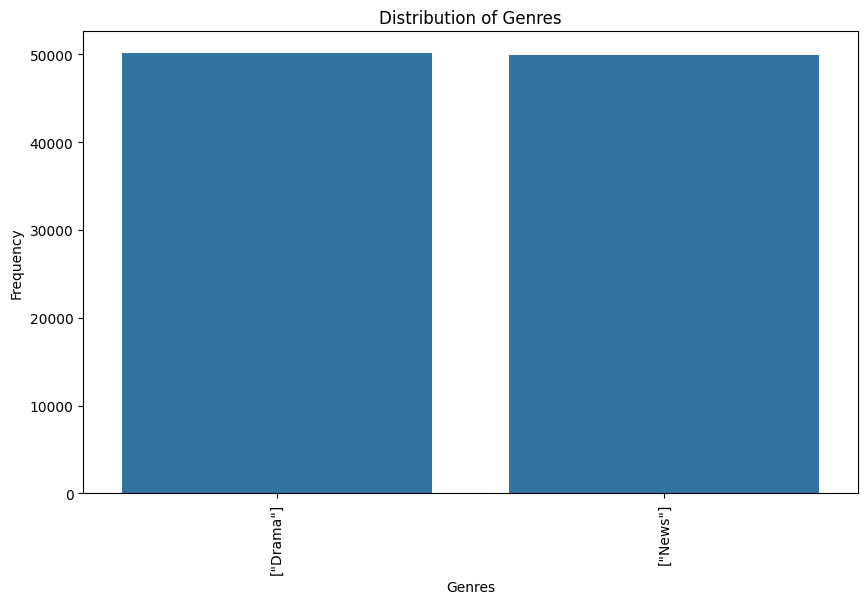

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=pandas_df, x='genres', order=pandas_df['genres'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.show()

Identify Outliers in Watch Time:

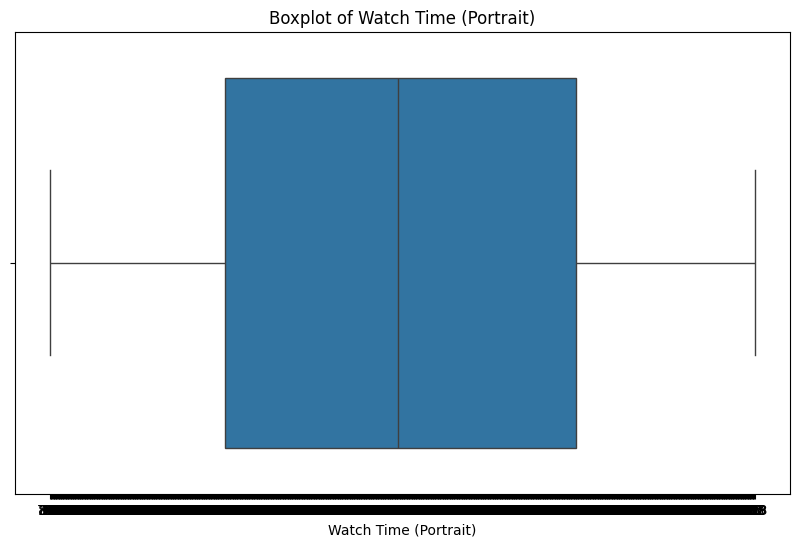

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pandas_df, x='watch_time_portrait')
plt.title('Boxplot of Watch Time (Portrait)')
plt.xlabel('Watch Time (Portrait)')
plt.show()

Detect Imbalance in User and Channel IDs:

In [ ]:
print(pandas_df.columns)


Index(['uid', 'crmid', 'ch', 'n', 'cl', 'ep', 'cg', 'opr', 'pn', 'keywords',
       'genres', 'watch_time_portrait', 'program_date', 'timestamp',
       'dateflink'],
      dtype='object')


In [ ]:
df_features.show(truncate=False)

+----------------+----------+-----------+----------------------+--------+---+-------------+------+----------------------+------------+---------+-------------------+-------------------------+----------------------------------+-------------------+
|uid             |crmid     |ch         |n                     |cl      |ep |cg           |opr   |pn                    |keywords    |genres   |watch_time_portrait|program_date             |timestamp                         |dateflink          |
+----------------+----------+-----------+----------------------+--------+---+-------------+------+----------------------+------------+---------+-------------------+-------------------------+----------------------------------+-------------------+
|00llfqkde3hfiweh|5280814033|ZeeKannada |ZeeKannada : Program2 |Kannada |76 |News         |Jio 4G|Pavitra+Rishta        |["News"]    |["News"] |732                |2021-06-02T00:00:00+05:30|Mon Jun 03 10:34:05 GMT+05:30 2024|2024-06-03 10:34:05|
|q9mz1q83scpuuuv

In [ ]:
df_features.printSchema()

root
 |-- uid: string (nullable = true)
 |-- crmid: string (nullable = true)
 |-- ch: string (nullable = true)
 |-- n: string (nullable = true)
 |-- cl: string (nullable = true)
 |-- ep: string (nullable = true)
 |-- cg: string (nullable = true)
 |-- opr: string (nullable = true)
 |-- pn: string (nullable = true)
 |-- keywords: string (nullable = true)
 |-- genres: string (nullable = false)
 |-- watch_time_portrait: string (nullable = true)
 |-- program_date: string (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- dateflink: string (nullable = true)



In [ ]:
pip install --upgrade pyspark pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 62.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [ ]:
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")


In [ ]:

rows = df_features.collect()

data = [row.asDict() for row in rows]

pandas_df = pd.DataFrame(data)

print(pandas_df.head())


                uid       crmid          ch                      n        cl  \
0  00llfqkde3hfiweh  5280814033  ZeeKannada  ZeeKannada : Program2   Kannada   
1  q9mz1q83scpuuuvf  8344862428     ZeeTVHD     ZeeTVHD : Program1   Kannada   
2  lc98xucko80l7z8t  8756205690    ZeeAnmol    ZeeAnmol : Program1  Assamese   
3  a7jcoulv2gvvj3vu  4836944596   ZeeTelugu   ZeeTelugu : Program1  Assamese   
4  xdmeawznl6f61q8n  7412863037    ZeeAnmol    ZeeAnmol : Program2     Hindi   

   ep    cg     opr                      pn   keywords     genres  \
0  76  News  Jio 4G          Pavitra+Rishta   ["News"]   ["News"]   
1  90  News  Jio 4G  Mithai+Kottu+Chittemma  ["Drama"]  ["Drama"]   
2  35  News  Jio 4G       Afternoon+Express   ["News"]  ["Drama"]   
3  80  News  Jio 4G            Punar+Vivaah   ["News"]   ["News"]   
4  76  News  Jio 4G  Mithai+Kottu+Chittemma   ["News"]  ["Drama"]   

  watch_time_portrait               program_date  \
0                 732  2021-06-02T00:00:00+05:30   


In [ ]:
try:
    pandas_df = df.toPandas()
    print(pandas_df.head())
except Exception as e:
    print("Error:", e)

Error: An error occurred while calling o825.pandasStructHandlingMode. Trace:
py4j.Py4JException: Method pandasStructHandlingMode([]) does not exist
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:321)
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:329)
	at py4j.Gateway.invoke(Gateway.java:274)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:750)




/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:198: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true, but has reached the error below and can not continue. Note that 'spark.sql.execution.arrow.pyspark.fallback.enabled' does not have an effect on failures in the middle of computation.
  An error occurred while calling o825.pandasStructHandlingMode. Trace:
py4j.Py4JException: Method pandasStructHandlingMode([]) does not exist
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:321)
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:329)
	at py4j.Gateway.invoke(Gateway.java:274)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at j

Building the Recommendation Model

Convert Categorical Features to Numeric:

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler


In [ ]:

indexer = StringIndexer(inputCol="genres", outputCol="genres_index")
df_features = indexer.fit(df_features).transform(df_features)


In [ ]:

encoder = OneHotEncoder(inputCols=["genres_index"], outputCols=["genres_vec"])
df_features = encoder.fit(df_features).transform(df_features)


**SQL QUERIES**

In [ ]:
import pandas as pd

In [ ]:
spark_df = spark.createDataFrame(pandas_df)

In [ ]:
spark_df.printSchema()


root
 |-- uid: string (nullable = true)
 |-- crmid: string (nullable = true)
 |-- ch: string (nullable = true)
 |-- n: string (nullable = true)
 |-- cl: string (nullable = true)
 |-- ep: string (nullable = true)
 |-- cg: string (nullable = true)
 |-- opr: string (nullable = true)
 |-- pn: string (nullable = true)
 |-- keywords: string (nullable = true)
 |-- genres: string (nullable = true)
 |-- watch_time_portrait: string (nullable = true)
 |-- program_date: string (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- dateflink: string (nullable = true)



In [ ]:
import pyspark.sql.functions as F
from pyspark.sql import SparkSession
high_logno_users = df_features.filter(df_features["watch_time_portrait"] > 400)
high_logno_users.show()

+----------------+----------+-----------+--------------------+--------+---+-------------+------+--------------------+------------+---------+-------------------+--------------------+--------------------+-------------------+------------+-------------+
|             uid|     crmid|         ch|                   n|      cl| ep|           cg|   opr|                  pn|    keywords|   genres|watch_time_portrait|        program_date|           timestamp|          dateflink|genres_index|   genres_vec|
+----------------+----------+-----------+--------------------+--------+---+-------------+------+--------------------+------------+---------+-------------------+--------------------+--------------------+-------------------+------------+-------------+
|00llfqkde3hfiweh|5280814033| ZeeKannada|ZeeKannada : Prog...| Kannada| 76|         News|Jio 4G|      Pavitra+Rishta|    ["News"]| ["News"]|                732|2021-06-02T00:00:...|Mon Jun 03 10:34:...|2024-06-03 10:34:05|         1.0|    (1,[],[])|


In [ ]:
from pyspark.sql.functions import concat, col, lit

formatted_df = df_features.withColumn("uid", concat(col("uid"), lit("_suffix")))

formatted_df.show()



+--------------------+----------+-----------+--------------------+--------+---+-------------+------+--------------------+------------+---------+-------------------+--------------------+--------------------+-------------------+------------+-------------+
|                 uid|     crmid|         ch|                   n|      cl| ep|           cg|   opr|                  pn|    keywords|   genres|watch_time_portrait|        program_date|           timestamp|          dateflink|genres_index|   genres_vec|
+--------------------+----------+-----------+--------------------+--------+---+-------------+------+--------------------+------------+---------+-------------------+--------------------+--------------------+-------------------+------------+-------------+
|00llfqkde3hfiweh_...|5280814033| ZeeKannada|ZeeKannada : Prog...| Kannada| 76|         News|Jio 4G|      Pavitra+Rishta|    ["News"]| ["News"]|                732|2021-06-02T00:00:...|Mon Jun 03 10:34:...|2024-06-03 10:34:05|         1.0

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Spark SQL Example") \
    .getOrCreate()

print(spark)




In [ ]:
df_features.createOrReplaceTempView("user_profiles")


In [ ]:
df_features.printSchema()
df_features.show()

root
 |-- uid: string (nullable = true)
 |-- crmid: string (nullable = true)
 |-- ch: string (nullable = true)
 |-- n: string (nullable = true)
 |-- cl: string (nullable = true)
 |-- ep: string (nullable = true)
 |-- cg: string (nullable = true)
 |-- opr: string (nullable = true)
 |-- pn: string (nullable = true)
 |-- keywords: string (nullable = true)
 |-- genres: string (nullable = false)
 |-- watch_time_portrait: string (nullable = true)
 |-- program_date: string (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- dateflink: string (nullable = true)
 |-- genres_index: double (nullable = false)
 |-- genres_vec: vector (nullable = true)

+----------------+----------+-----------+--------------------+--------+---+-------------+------+--------------------+------------+---------+-------------------+--------------------+--------------------+-------------------+------------+-------------+
|             uid|     crmid|         ch|                   n|      cl| ep|           cg|  

In [ ]:

df_features.select("crmid", "watch_time_portrait").show(5)

+----------+-------------------+
|     crmid|watch_time_portrait|
+----------+-------------------+
|5280814033|                732|
|8344862428|                802|
|8756205690|                304|
|4836944596|                821|
|7412863037|                767|
+----------+-------------------+
only showing top 5 rows



# Performing the sql queries using DataFrame API

In [ ]:
from pyspark.sql import SQLContext

from pyspark.sql import SparkSession


spark = SparkSession.builder \
    .appName("SQL on JSON Data") \
    .getOrCreate()


df_features.select("crmid", "watch_time_portrait").show(5)

df_features.createOrReplaceTempView("user_profiles")


top_users = df_features.select("crmid", "watch_time_portrait") \
    .orderBy(df_features["watch_time_portrait"].desc()) \
    .limit(10)


+----------+-------------------+
|     crmid|watch_time_portrait|
+----------+-------------------+
|5280814033|                732|
|8344862428|                802|
|8756205690|                304|
|4836944596|                821|
|7412863037|                767|
+----------+-------------------+
only showing top 5 rows



Users with crmid starting with 'ABC'

In [ ]:
specific_users = df_features.filter(df_features.crmid.like('ABC%'))
specific_users.show()

+---+-----+---+---+---+---+---+---+---+--------+------+-------------------+------------+---------+---------+------------+----------+
|uid|crmid| ch|  n| cl| ep| cg|opr| pn|keywords|genres|watch_time_portrait|program_date|timestamp|dateflink|genres_index|genres_vec|
+---+-----+---+---+---+---+---+---+---+--------+------+-------------------+------------+---------+---------+------------+----------+
+---+-----+---+---+---+---+---+---+---+--------+------+-------------------+------------+---------+---------+------------+----------+



Users with watch_time_portrait within a specific range

In [ ]:
users_in_range = df_features.filter(
    (df_features.watch_time_portrait.between(100, 500))
)
users_in_range.show()

+----------------+----------+-----------+--------------------+--------+---+-------------+------+--------------------+------------+---------+-------------------+--------------------+--------------------+-------------------+------------+-------------+
|             uid|     crmid|         ch|                   n|      cl| ep|           cg|   opr|                  pn|    keywords|   genres|watch_time_portrait|        program_date|           timestamp|          dateflink|genres_index|   genres_vec|
+----------------+----------+-----------+--------------------+--------+---+-------------+------+--------------------+------------+---------+-------------------+--------------------+--------------------+-------------------+------------+-------------+
|lc98xucko80l7z8t|8756205690|   ZeeAnmol| ZeeAnmol : Program1|Assamese| 35|         News|Jio 4G|   Afternoon+Express|    ["News"]|["Drama"]|                304|2021-06-02T00:00:...|Fri May 31 19:03:...|2024-05-31 19:03:27|         0.0|(1,[0],[1.0])|


In [ ]:
user_genre_pref = df_features.groupBy("crmid").count().alias("view_count")
user_genre_pref.show()

+----------+-----+
|     crmid|count|
+----------+-----+
|6252317283|    1|
|5023330161|    1|
|5935711814|    1|
|2023168699|    1|
|7349071583|    1|
|2757546562|    1|
|1068291271|    1|
|3431054331|    1|
|4175059349|    1|
|1973358517|    1|
|4006434982|    1|
|5344367326|    1|
|8485716296|    1|
|3381503546|    1|
|7916610618|    1|
|8836097134|    1|
|6351937769|    1|
|7710013797|    1|
|8809668146|    1|
|2105786383|    1|
+----------+-----+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import split, col

df_features = df_features.withColumn("genres_array", split(col("genres"), ","))



In [ ]:
df_features.select("genres_array").show(truncate=False)


+------------+
|genres_array|
+------------+
|[["News"]]  |
|[["Drama"]] |
|[["Drama"]] |
|[["News"]]  |
|[["Drama"]] |
|[["News"]]  |
|[["News"]]  |
|[["News"]]  |
|[["Drama"]] |
|[["News"]]  |
|[["Drama"]] |
|[["News"]]  |
|[["Drama"]] |
|[["News"]]  |
|[["Drama"]] |
|[["News"]]  |
|[["Drama"]] |
|[["Drama"]] |
|[["Drama"]] |
|[["Drama"]] |
+------------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import explode, col, udf
from pyspark.sql.types import ArrayType, StringType


def flatten_genres(genres):
    if isinstance(genres, list) and len(genres) > 0:
        inner_genres = genres[0]
        if isinstance(inner_genres, list):
            return inner_genres
    return []

flatten_genres_udf = udf(flatten_genres, ArrayType(StringType()))

df_flattened = df_features.withColumn("genres_flattened", flatten_genres_udf(col("genres_array")))

df_exploded = df_flattened.withColumn("genre", explode(col("genres_flattened")))

df_exploded.show()

+---+-----+---+---+---+---+---+---+---+--------+------+-------------------+------------+---------+---------+------------+----------+------------+----------------+-----+
|uid|crmid| ch|  n| cl| ep| cg|opr| pn|keywords|genres|watch_time_portrait|program_date|timestamp|dateflink|genres_index|genres_vec|genres_array|genres_flattened|genre|
+---+-----+---+---+---+---+---+---+---+--------+------+-------------------+------------+---------+---------+------------+----------+------------+----------------+-----+
+---+-----+---+---+---+---+---+---+---+--------+------+-------------------+------------+---------+---------+------------+----------+------------+----------------+-----+



In [ ]:
user_viewing_df = df_exploded.select(
    col("uid").alias("user_id"),
    col("genre"),
    col("watch_time_portrait").alias("view_time")
)

In [ ]:

user_viewing_df.show(truncate=False)

+-------+-----+---------+
|user_id|genre|view_time|
+-------+-----+---------+
+-------+-----+---------+



In [ ]:
df_features.select("genres_array").show(truncate=False)
df_flattened.select("genres_flattened").show(truncate=False)


+------------+
|genres_array|
+------------+
|[["News"]]  |
|[["Drama"]] |
|[["Drama"]] |
|[["News"]]  |
|[["Drama"]] |
|[["News"]]  |
|[["News"]]  |
|[["News"]]  |
|[["Drama"]] |
|[["News"]]  |
|[["Drama"]] |
|[["News"]]  |
|[["Drama"]] |
|[["News"]]  |
|[["Drama"]] |
|[["News"]]  |
|[["Drama"]] |
|[["Drama"]] |
|[["Drama"]] |
|[["Drama"]] |
+------------+
only showing top 20 rows

+----------------+
|genres_flattened|
+----------------+
|[]              |
|[]              |
|[]              |
|[]              |
|[]              |
|[]              |
|[]              |
|[]              |
|[]              |
|[]              |
|[]              |
|[]              |
|[]              |
|[]              |
|[]              |
|[]              |
|[]              |
|[]              |
|[]              |
|[]              |
+----------------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import explode, col

df_flattened = df_features.withColumn("genres_flattened", explode(col("genres_array")))

df_flattened.select("genres_flattened").show(truncate=False)


+----------------+
|genres_flattened|
+----------------+
|["News"]        |
|["Drama"]       |
|["Drama"]       |
|["News"]        |
|["Drama"]       |
|["News"]        |
|["News"]        |
|["News"]        |
|["Drama"]       |
|["News"]        |
|["Drama"]       |
|["News"]        |
|["Drama"]       |
|["News"]        |
|["Drama"]       |
|["News"]        |
|["Drama"]       |
|["Drama"]       |
|["Drama"]       |
|["Drama"]       |
+----------------+
only showing top 20 rows



# Convert genres_flattened to ARRAY Type

In [ ]:
from pyspark.sql.functions import col, split

df_flattened = df_features.withColumn("genres_flattened", explode(split(col("genres"), ",")))

df_flattened.show()
df_array_conversion = df_flattened.withColumn(
    "genres_array_converted",
    split(col("genres_flattened"), ",")
)

df_array_conversion.show(truncate=False)


+----------------+----------+-----------+--------------------+--------+---+-------------+------+--------------------+------------+---------+-------------------+--------------------+--------------------+-------------------+------------+-------------+------------+----------------+
|             uid|     crmid|         ch|                   n|      cl| ep|           cg|   opr|                  pn|    keywords|   genres|watch_time_portrait|        program_date|           timestamp|          dateflink|genres_index|   genres_vec|genres_array|genres_flattened|
+----------------+----------+-----------+--------------------+--------+---+-------------+------+--------------------+------------+---------+-------------------+--------------------+--------------------+-------------------+------------+-------------+------------+----------------+
|00llfqkde3hfiweh|5280814033| ZeeKannada|ZeeKannada : Prog...| Kannada| 76|         News|Jio 4G|      Pavitra+Rishta|    ["News"]| ["News"]|                732|

# Flatten the Converted Array

After converting the genres_flattened to an ARRAY, we then proceed to extract the genre.

In [ ]:
df_genres_extracted = df_array_conversion.withColumn(
    "genre",
    col("genres_array_converted")[0]
)
df_genres_extracted.show()

+----------------+----------+-----------+--------------------+--------+---+-------------+------+--------------------+------------+---------+-------------------+--------------------+--------------------+-------------------+------------+-------------+------------+----------------+----------------------+---------+
|             uid|     crmid|         ch|                   n|      cl| ep|           cg|   opr|                  pn|    keywords|   genres|watch_time_portrait|        program_date|           timestamp|          dateflink|genres_index|   genres_vec|genres_array|genres_flattened|genres_array_converted|    genre|
+----------------+----------+-----------+--------------------+--------+---+-------------+------+--------------------+------------+---------+-------------------+--------------------+--------------------+-------------------+------------+-------------+------------+----------------+----------------------+---------+
|00llfqkde3hfiweh|5280814033| ZeeKannada|ZeeKannada : Prog...

In [ ]:
user_viewing_df = df_genres_extracted.select(
    col("uid").alias("user_id"),
    col("genre"),
    col("watch_time_portrait").alias("view_time")
)
user_viewing_df.show(truncate=False)

+----------------+---------+---------+
|user_id         |genre    |view_time|
+----------------+---------+---------+
|00llfqkde3hfiweh|["News"] |732      |
|q9mz1q83scpuuuvf|["Drama"]|802      |
|lc98xucko80l7z8t|["Drama"]|304      |
|a7jcoulv2gvvj3vu|["News"] |821      |
|xdmeawznl6f61q8n|["Drama"]|767      |
|gahhs6z9omzwjd2q|["News"] |99       |
|al3xhyechbsjnnfk|["News"] |179      |
|qnkclm839qgcfl67|["News"] |147      |
|11gz136ylk30jw7s|["Drama"]|678      |
|thg8qusdyret754f|["News"] |837      |
|bi5z2vp70mbsozau|["Drama"]|88       |
|j0xjlgtnku1tn493|["News"] |37       |
|bfu7w9bj2dfub6n9|["Drama"]|20       |
|gqmkphlbnx13h4o1|["News"] |40       |
|9v9at5u9itcr1i0k|["Drama"]|544      |
|xqumjemadhh5cckq|["News"] |480      |
|f7mwj1r2qxso8kt1|["Drama"]|970      |
|qqwh1e8a89mrxkov|["Drama"]|625      |
|bnr691hj223t7uoy|["Drama"]|527      |
|oynmyuvitaur7y0c|["Drama"]|39       |
+----------------+---------+---------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import col, split, regexp_replace

df_array_conversion = df_flattened.withColumn(
    "genres_array_converted",
    split(regexp_replace(col("genres_flattened"), r'[\[\]"]', ''), ',')
)

df_array_conversion.show(truncate=False)


+----------------+----------+-----------+----------------------+--------+---+-------------+------+----------------------+------------+---------+-------------------+-------------------------+----------------------------------+-------------------+------------+-------------+------------+----------------+----------------------+
|uid             |crmid     |ch         |n                     |cl      |ep |cg           |opr   |pn                    |keywords    |genres   |watch_time_portrait|program_date             |timestamp                         |dateflink          |genres_index|genres_vec   |genres_array|genres_flattened|genres_array_converted|
+----------------+----------+-----------+----------------------+--------+---+-------------+------+----------------------+------------+---------+-------------------+-------------------------+----------------------------------+-------------------+------------+-------------+------------+----------------+----------------------+
|00llfqkde3hfiweh|5280

In [ ]:
from pyspark.sql import SparkSession, functions as F
from pyspark.sql.functions import col, split, regexp_replace
from pyspark.ml.feature import StringIndexer
from pyspark.ml.recommendation import ALS


In [ ]:
spark = SparkSession.builder \
    .appName("RecommendationModel") \
    .getOrCreate()


In [ ]:
df_array_conversion = df_flattened.withColumn(
    "genres_array_converted",
    split(regexp_replace(col("genres_flattened"), r'[\[\]"]', ''), ',')
)
df_array_conversion.show()

+----------------+----------+-----------+--------------------+--------+---+-------------+------+--------------------+------------+---------+-------------------+--------------------+--------------------+-------------------+------------+-------------+------------+----------------+----------------------+
|             uid|     crmid|         ch|                   n|      cl| ep|           cg|   opr|                  pn|    keywords|   genres|watch_time_portrait|        program_date|           timestamp|          dateflink|genres_index|   genres_vec|genres_array|genres_flattened|genres_array_converted|
+----------------+----------+-----------+--------------------+--------+---+-------------+------+--------------------+------------+---------+-------------------+--------------------+--------------------+-------------------+------------+-------------+------------+----------------+----------------------+
|00llfqkde3hfiweh|5280814033| ZeeKannada|ZeeKannada : Prog...| Kannada| 76|         News|Ji

In [ ]:
from pyspark.sql.functions import col, split, regexp_replace, explode
from pyspark.sql.types import DoubleType

# Example DataFrame `df_flattened` with `genres_flattened`
df_array_conversion = df_flattened.withColumn(
    "genres_array_converted",
    split(regexp_replace(col("genres_flattened"), r'[\[\]"]', ''), ',')
)

# Extract the first genre from the array for simplicity
df_genres_extracted = df_array_conversion.withColumn(
    "genre",
    col("genres_array_converted")[0]
)

# Create a DataFrame with user viewing data
user_viewing_df = df_genres_extracted.select(
    col("crmid").alias("user_id"),
    col("genre"),
    col("watch_time_portrait").alias("view_time")
)

user_viewing_df.show(truncate=False)

+----------+-----+---------+
|user_id   |genre|view_time|
+----------+-----+---------+
|5280814033|News |732      |
|8344862428|Drama|802      |
|8756205690|Drama|304      |
|4836944596|News |821      |
|7412863037|Drama|767      |
|6397330561|News |99       |
|6815437274|News |179      |
|5707084375|News |147      |
|7926247692|Drama|678      |
|4154998109|News |837      |
|9497383869|Drama|88       |
|7362514332|News |37       |
|2384690764|Drama|20       |
|3191315730|News |40       |
|7286994583|Drama|544      |
|2872167342|News |480      |
|4523108202|Drama|970      |
|4368321043|Drama|625      |
|1904538675|Drama|527      |
|7431393489|Drama|39       |
+----------+-----+---------+
only showing top 20 rows



In [ ]:
from pyspark.sql import functions as F


user_genre_pref = user_viewing_df.groupBy("user_id", "genre").agg(F.sum("view_time").alias("total_view_time"))


user_genre_matrix = user_genre_pref.groupBy("user_id").pivot("genre").sum("total_view_time").na.fill(0)


In [ ]:
def create_long_format(df):
    rows = []
    for row in df.collect():
        user_id = row['user_id']
        for genre in df.columns:
            if genre != 'user_id':
                rows.append((user_id, genre, row[genre]))
    return rows

ratings_data = create_long_format(user_genre_matrix)
ratings = spark.createDataFrame(ratings_data, ["user_id", "genre", "rating"])


In [ ]:
from pyspark.ml.feature import StringIndexer

user_indexer = StringIndexer(inputCol="user_id", outputCol="user_index").fit(ratings)
genre_indexer = StringIndexer(inputCol="genre", outputCol="genre_index").fit(ratings)

ratings_indexed = user_indexer.transform(ratings)
ratings_indexed = genre_indexer.transform(ratings_indexed)


In [ ]:
from pyspark.ml.recommendation import ALS


als = ALS(
    userCol="user_index",
    itemCol="genre_index",
    ratingCol="rating",
    coldStartStrategy="drop",
    rank=10,
    maxIter=10,
    regParam=0.1
)

model = als.fit(ratings_indexed)


user_recommendations = model.recommendForAllUsers(numItems=5)
user_recommendations.show(truncate=False)


+----------+-----------------------------------+
|user_index|recommendations                    |
+----------+-----------------------------------+
|1         |[{1, 895.34534}, {0, -0.4999237}]  |
|3         |[{1, 436.21942}, {0, -0.24356079}] |
|5         |[{0, 123.748886}, {1, -0.06895447}]|
|6         |[{1, 927.21533}, {0, -0.5177002}]  |
|9         |[{0, 351.28717}, {1, -0.19574356}] |
|12        |[{1, 516.89014}, {0, -0.28862}]    |
|13        |[{1, 311.72757}, {0, -0.17406464}] |
|15        |[{1, 96.60568}, {0, -0.053941727}] |
|16        |[{0, 533.9166}, {1, -0.29750443}]  |
|17        |[{1, 534.81696}, {0, -0.2986145}]  |
|19        |[{1, 18.92276}, {0, -0.010565281}] |
|20        |[{1, 879.4104}, {0, -0.49101257}]  |
|22        |[{1, 585.6096}, {0, -0.3269806}]   |
|26        |[{1, 703.12994}, {0, -0.39259338}] |
|27        |[{0, 744.4893}, {1, -0.41484833}]  |
|28        |[{1, 763.88196}, {0, -0.42652893}] |
|31        |[{1, 798.7397}, {0, -0.44596863}]  |
|34        |[{1, 802

In [ ]:
num_users = user_viewing_df.select("user_id").distinct().count()
print(f"Number of Users: {num_users}")


Number of Users: 100000


In [ ]:
num_recommendations = 2  # Number of items to recommend for each user

# Generate recommendations for all users
user_recommendations = model.recommendForAllUsers(numItems=num_recommendations)
user_recommendations.show(truncate=False)


+----------+-----------------------------------+
|user_index|recommendations                    |
+----------+-----------------------------------+
|1         |[{1, 895.34534}, {0, -0.4999237}]  |
|3         |[{1, 436.21942}, {0, -0.24356079}] |
|5         |[{0, 123.748886}, {1, -0.06895447}]|
|6         |[{1, 927.21533}, {0, -0.5177002}]  |
|9         |[{0, 351.28717}, {1, -0.19574356}] |
|12        |[{1, 516.89014}, {0, -0.28862}]    |
|13        |[{1, 311.72757}, {0, -0.17406464}] |
|15        |[{1, 96.60568}, {0, -0.053941727}] |
|16        |[{0, 533.9166}, {1, -0.29750443}]  |
|17        |[{1, 534.81696}, {0, -0.2986145}]  |
|19        |[{1, 18.92276}, {0, -0.010565281}] |
|20        |[{1, 879.4104}, {0, -0.49101257}]  |
|22        |[{1, 585.6096}, {0, -0.3269806}]   |
|26        |[{1, 703.12994}, {0, -0.39259338}] |
|27        |[{0, 744.4893}, {1, -0.41484833}]  |
|28        |[{1, 763.88196}, {0, -0.42652893}] |
|31        |[{1, 798.7397}, {0, -0.44596863}]  |
|34        |[{1, 802

Creating genre mappping

In [ ]:
from pyspark.sql import functions as F

channels_df = spark.createDataFrame([
    ("ZeeKannada", 3),
    ("ZeeAnmol", 2),
    ("ZeeTelugu", 5),
    ("ZeeTVHD", 4),
    ("AajTak", 0),
    ("News18Assam", 1)
], ["channel", "channel_index"])

serials_df = spark.createDataFrame([
    ("Punar+Vivaah", 4),
    ("Mithai+Kottu+Chithra", 1),
    ("Trinayani", 5),
    ("Pavitra+Rishta", 3),
    ("Afternoon+Express", 0),
    ("News", 2)
], ["serial", "serial_index"])

genre_to_channels = {
    "News": ["News18Assam", "AajTak"],
    "Drama": ["ZeeKannada", "ZeeAnmol"],
    "Entertainment": ["ZeeTelugu", "ZeeTVHD"]
}

genre_to_serials = {
    "News": ["News"],
    "Drama": ["Pavitra Rishta", "Mithai Kottu Chittemma"],
    "Entertainment": ["Trinayani", "Punar Vivaah"]
}



Creating mapping dictionaries

In [ ]:



channel_mapping = dict(channels_df.select("channel_index", "channel").rdd.map(lambda row: (row["channel_index"], row["channel"])).collect())
serial_mapping = dict(serials_df.select("serial_index", "serial").rdd.map(lambda row: (row["serial_index"], row["serial"])).collect())

In [ ]:

user_recommendations.printSchema()

user_recommendations.show(truncate=False)



root
 |-- user_index: integer (nullable = false)
 |-- recommendations: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- genre_index: integer (nullable = true)
 |    |    |-- rating: float (nullable = true)

+----------+-----------------------------------+
|user_index|recommendations                    |
+----------+-----------------------------------+
|1         |[{1, 895.34534}, {0, -0.4999237}]  |
|3         |[{1, 436.21942}, {0, -0.24356079}] |
|5         |[{0, 123.748886}, {1, -0.06895447}]|
|6         |[{1, 927.21533}, {0, -0.5177002}]  |
|9         |[{0, 351.28717}, {1, -0.19574356}] |
|12        |[{1, 516.89014}, {0, -0.28862}]    |
|13        |[{1, 311.72757}, {0, -0.17406464}] |
|15        |[{1, 96.60568}, {0, -0.053941727}] |
|16        |[{0, 533.9166}, {1, -0.29750443}]  |
|17        |[{1, 534.81696}, {0, -0.2986145}]  |
|19        |[{1, 18.92276}, {0, -0.010565281}] |
|20        |[{1, 879.4104}, {0, -0.49101257}]  |
|22        |[{1, 585

UDF to get channels and serials based on genre and then registering those udfs

In [ ]:

def get_channels(genre):
    return genre_to_channels.get(genre, [])

def get_serials(genre):
    return genre_to_serials.get(genre, [])

get_channels_udf = udf(get_channels, ArrayType(StringType()))
get_serials_udf = udf(get_serials, ArrayType(StringType()))

In [ ]:
from pyspark.sql.functions import col

user_viewing_df = df_genres_extracted.select(
    col("crmid").alias("user_id"),
    col("genre"),
    col("watch_time_portrait").alias("view_time")
)

user_viewing_df = user_viewing_df.withColumn(
    "channels",
    get_channels_udf(col("genre"))
).withColumn(
    "serials",
    get_serials_udf(col("genre"))
)

user_viewing_df.show(truncate=False)

+----------+-----+---------+----------------------+----------------------------------------+
|user_id   |genre|view_time|channels              |serials                                 |
+----------+-----+---------+----------------------+----------------------------------------+
|5280814033|News |732      |[News18Assam, AajTak] |[News]                                  |
|8344862428|Drama|802      |[ZeeKannada, ZeeAnmol]|[Pavitra Rishta, Mithai Kottu Chittemma]|
|8756205690|Drama|304      |[ZeeKannada, ZeeAnmol]|[Pavitra Rishta, Mithai Kottu Chittemma]|
|4836944596|News |821      |[News18Assam, AajTak] |[News]                                  |
|7412863037|Drama|767      |[ZeeKannada, ZeeAnmol]|[Pavitra Rishta, Mithai Kottu Chittemma]|
|6397330561|News |99       |[News18Assam, AajTak] |[News]                                  |
|6815437274|News |179      |[News18Assam, AajTak] |[News]                                  |
|5707084375|News |147      |[News18Assam, AajTak] |[News]             

In [ ]:
from pyspark.sql.functions import explode
from pyspark.ml.feature import StringIndexer
from pyspark.sql.types import DoubleType


exploded_df = user_viewing_df.withColumn("channel", explode(col("channels"))) \
    .withColumn("serial", explode(col("serials")))

exploded_df = exploded_df.withColumn("view_time", col("view_time").cast(DoubleType()))


user_indexer = StringIndexer(inputCol="user_id", outputCol="user_index")
genre_indexer = StringIndexer(inputCol="genre", outputCol="genre_index")
channel_indexer = StringIndexer(inputCol="channel", outputCol="channel_index")
serial_indexer = StringIndexer(inputCol="serial", outputCol="serial_index")

user_indexer_model = user_indexer.fit(exploded_df)
genre_indexer_model = genre_indexer.fit(exploded_df)
channel_indexer_model = channel_indexer.fit(exploded_df)
serial_indexer_model = serial_indexer.fit(exploded_df)

indexed_df = user_indexer_model.transform(exploded_df)
indexed_df = genre_indexer_model.transform(indexed_df)
indexed_df = channel_indexer_model.transform(indexed_df)
indexed_df = serial_indexer_model.transform(indexed_df)

model_df = indexed_df.select("user_index", "genre_index", "channel_index", "serial_index", "view_time")

model_df.show(truncate=False)


+----------+-----------+-------------+------------+---------+
|user_index|genre_index|channel_index|serial_index|view_time|
+----------+-----------+-------------+------------+---------+
|73926.0   |1.0        |3.0          |2.0         |732.0    |
|73926.0   |1.0        |2.0          |2.0         |732.0    |
|40947.0   |0.0        |1.0          |1.0         |802.0    |
|40947.0   |0.0        |1.0          |0.0         |802.0    |
|40947.0   |0.0        |0.0          |1.0         |802.0    |
|40947.0   |0.0        |0.0          |0.0         |802.0    |
|43253.0   |0.0        |1.0          |1.0         |304.0    |
|43253.0   |0.0        |1.0          |0.0         |304.0    |
|43253.0   |0.0        |0.0          |1.0         |304.0    |
|43253.0   |0.0        |0.0          |0.0         |304.0    |
|71393.0   |1.0        |3.0          |2.0         |821.0    |
|71393.0   |1.0        |2.0          |2.0         |821.0    |
|35763.0   |0.0        |1.0          |1.0         |767.0    |
|35763.0

In [ ]:
from pyspark.ml.recommendation import ALS


als = ALS(
    userCol="user_index",
    itemCol="channel_index",
    ratingCol="view_time",
    coldStartStrategy="drop",
    rank=10,
    maxIter=10,
    regParam=0.1
)

model = als.fit(model_df)


predictions = model.transform(model_df)
predictions.show(truncate=False)


+----------+-----------+-------------+------------+---------+----------+
|user_index|genre_index|channel_index|serial_index|view_time|prediction|
+----------+-----------+-------------+------------+---------+----------+
|65408.0   |1.0        |3.0          |2.0         |984.0    |983.63116 |
|65408.0   |1.0        |2.0          |2.0         |984.0    |983.63116 |
|82529.0   |1.0        |3.0          |2.0         |807.0    |806.6975  |
|82529.0   |1.0        |2.0          |2.0         |807.0    |806.6975  |
|77422.0   |1.0        |3.0          |2.0         |686.0    |685.7428  |
|77422.0   |1.0        |2.0          |2.0         |686.0    |685.7428  |
|78120.0   |1.0        |3.0          |2.0         |660.0    |659.75256 |
|78120.0   |1.0        |2.0          |2.0         |660.0    |659.75256 |
|54264.0   |1.0        |3.0          |2.0         |525.0    |524.80316 |
|54264.0   |1.0        |2.0          |2.0         |525.0    |524.80316 |
|65867.0   |1.0        |3.0          |2.0         |

In [ ]:

user_recommendations = model.recommendForAllUsers(numItems=10)


user_recommendations.show(truncate=False)


+----------+------------------------------------------------------------------+
|user_index|recommendations                                                   |
+----------+------------------------------------------------------------------+
|1         |[{1, 318.82816}, {0, 318.82816}, {3, -150.16376}, {2, -150.16376}]|
|3         |[{1, 472.74515}, {0, 472.74515}, {3, -222.65662}, {2, -222.65662}]|
|5         |[{1, 9.994612}, {0, 9.994612}, {3, -4.707328}, {2, -4.707328}]    |
|6         |[{1, 312.83136}, {0, 312.83136}, {3, -147.33937}, {2, -147.33937}]|
|9         |[{1, 745.59814}, {0, 745.59814}, {3, -351.1667}, {2, -351.1667}]  |
|12        |[{1, 495.73276}, {0, 495.73276}, {3, -233.48346}, {2, -233.48346}]|
|13        |[{1, 242.8691}, {0, 242.8691}, {3, -114.38808}, {2, -114.38808}]  |
|15        |[{1, 994.464}, {0, 994.464}, {3, -468.3791}, {2, -468.3791}]      |
|16        |[{1, 63.96552}, {0, 63.96552}, {3, -30.126896}, {2, -30.126896}]  |
|17        |[{1, 305.83514}, {0, 305.835

In [ ]:

    userCol="user_index",
    itemCol="genre_index",
    ratingCol="view_time",
    coldStartStrategy="drop",
    rank=10,
    maxIter=10,
    regParam=0.1
)

model = als.fit(model_df)

user_recommendations = model.recommendForAllUsers(numItems=10)

user_recommendations.show(truncate=False)



def create_long_format(df):
    rows = []
    for row in df.toLocalIterator():
        user_id = row['user_id']
        for genre in df.columns:
            if genre != 'user_id':
                rows.append((user_id, genre, row[genre]))
    return rows
def get_recommendations_for_user(crmid, model, user_indexer_model, genre_indexer_model,
                                channel_indexer_model, serial_indexer_model, user_viewing_df,
                                genre_to_channels, genre_to_serials):

    user_genre_df = user_viewing_df.filter(col("user_id") == crmid).select("genre").distinct()
    if user_genre_df.count() == 0:
        return {"error": "No viewing history found for this user."}
    user_genre = user_genre_df.collect()[0].genre

    associated_channels = genre_to_channels.get(user_genre, [])
    associated_serials = genre_to_serials.get(user_genre, [])

    user_index_df = user_indexer_model.transform(spark.createDataFrame([(crmid,)], ["user_id"]))
    if user_index_df.count() == 0:
        return {"error": "User not found in the index."}
    user_index = user_index_df.collect()[0]["user_index"]

    user_recommendations_df = model.recommendForAllUsers(numItems=10).filter(col("user_index") == user_index)
    if user_recommendations_df.count() == 0:
        return {"error": "No recommendations found for this user."}
    recommendations = user_recommendations_df.collect()[0]["recommendations"]

    recommended_channel = None
    recommended_serial = None
    for recommendation in recommendations:
      genre_index = recommendation["genre_index"]

      genre_mapping = {i: g for g, i in enumerate(genre_indexer_model.labels)}
      genre = genre_mapping.get(genre_index, "Unknown")

      recommended_channels = genre_to_channels.get(genre, [])
      recommended_serials = genre_to_serials.get(genre, [])

      for channel in recommended_channels:
          if channel not in associated_channels:
              recommended_channel = channel
              break

      for serial in recommended_serials:
          if serial not in associated_serials:
              recommended_serial = serial
              break

      if recommended_channel and recommended_serial:
          break


    result = {
        "crmid": crmid,
        "preferred_genre": user_genre,
        "associated_channels": associated_channels,
        "associated_serials": associated_serials,
    }

    return result

+----------+---------------------------------+
|user_index|recommendations                  |
+----------+---------------------------------+
|1         |[{0, 318.82816}, {1, -150.16376}]|
|3         |[{0, 472.74515}, {1, -222.65662}]|
|5         |[{0, 9.994612}, {1, -4.707328}]  |
|6         |[{0, 312.83136}, {1, -147.33937}]|
|9         |[{0, 745.59814}, {1, -351.1667}] |
|12        |[{0, 495.73276}, {1, -233.48346}]|
|13        |[{0, 242.8691}, {1, -114.38807}] |
|15        |[{0, 994.464}, {1, -468.3791}]   |
|16        |[{0, 63.96552}, {1, -30.126896}] |
|17        |[{0, 305.83514}, {1, -144.04424}]|
|19        |[{0, 365.8028}, {1, -172.28821}] |
|20        |[{0, 494.73334}, {1, -233.01276}]|
|22        |[{0, 386.7915}, {1, -182.17361}] |
|26        |[{0, 989.4667}, {1, -466.0255}]  |
|27        |[{0, 878.52637}, {1, -413.77414}]|
|28        |[{0, 663.6423}, {1, -312.5666}]  |
|31        |[{0, 347.81247}, {1, -163.81502}]|
|34        |[{0, 961.4816}, {1, -452.84494}] |
|35        |[

In [ ]:
crmid_to_recommend = "5280814033"
recommendations = get_recommendations_for_user(
    crmid_to_recommend,
    model,
    user_indexer_model,
    genre_indexer_model,
    channel_indexer_model,
    serial_indexer_model,
    user_viewing_df,
    genre_to_channels,
    genre_to_serials
)

if "error" in recommendations:
    print("Error:", recommendations["error"])
else:
    print("Preferred Genre:", recommendations["preferred_genre"])
    print("Associated Channels:", recommendations["associated_channels"])
    print("Associated Serials:", recommendations["associated_serials"])

Preferred Genre: News
Associated Channels: ['News18Assam', 'AajTak']
Associated Serials: ['News']


In [ ]:
crmid_to_recommend = "9497383869" D
recommendations = get_recommendations_for_user(
    crmid_to_recommend,
    model,
    user_indexer_model,
    genre_indexer_model,
    channel_indexer_model,
    serial_indexer_model,
    user_viewing_df,
    genre_to_channels,
    genre_to_serials
)

if "error" in recommendations:
    print("Error:", recommendations["error"])
else:
    print("Preferred Genre:", recommendations["preferred_genre"])
    print("Associated Channels:", recommendations["associated_channels"])
    print("Associated Serials:", recommendations["associated_serials"])

Preferred Genre: Drama
Associated Channels: ['ZeeKannada', 'ZeeAnmol']
Associated Serials: ['Pavitra Rishta', 'Mithai Kottu Chittemma']


In [ ]:
crmid_to_recommend = "8756205690"
recommendations = get_recommendations_for_user(
    crmid_to_recommend,
    model,
    user_indexer_model,
    genre_indexer_model,
    channel_indexer_model,
    serial_indexer_model,
    user_viewing_df,
    genre_to_channels,
    genre_to_serials
)


if "error" in recommendations:
    print("Error:", recommendations["error"])
else:
    print("Preferred Genre:", recommendations["preferred_genre"])
    print("Associated Channels:", recommendations["associated_channels"])
    print("Associated Serials:", recommendations["associated_serials"])

Preferred Genre: Drama
Associated Channels: ['ZeeKannada', 'ZeeAnmol']
Associated Serials: ['Pavitra Rishta', 'Mithai Kottu Chittemma']


In [ ]:
user_recommendations.printSchema()


root
 |-- user_index: integer (nullable = false)
 |-- recommendations: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- genre_index: integer (nullable = true)
 |    |    |-- rating: float (nullable = true)

